## Importing library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Importing image

In [2]:
image = mpimg.imread('me.jpeg')
red_scale = 0.2989
green_scale = 0.5870
blue_scale = 0.1140
image = np.dot(image[..., :3], [red_scale, green_scale, blue_scale])
image = image.astype(np.uint8)

## Adding padding

In [3]:
pad = 50
mean = 0
count = 0

b_r_size = image.shape[0]+2*pad
b_c_size = image.shape[1]+2*pad

border_img = np.zeros(shape=(b_r_size,b_c_size,3), dtype=np.uint8)
for i in range(image.shape[0]):
    mean += image[i][0] + image[i][-1]
    count += 2
for i in range(image.shape[1]):
    mean += image[0][i] + image[-1][i]
    count += 2

mean /= count
mean = mean.astype(np.uint8)
for i in range(border_img.shape[0]):
    for j in range(border_img.shape[1]):
        border_img[i][j] = mean

x = 0
y = 0
for i in range(pad+1,border_img.shape[0]-pad):
    for j in range(pad+1,border_img.shape[1]-pad):
        border_img[i][j] = image[x][y]
        y+=1
    x+=1
    y=0


/tmp/ipykernel_36039/2242015856.py:10: RuntimeWarning: overflow encountered in scalar add
  mean += image[i][0] + image[i][-1]
/tmp/ipykernel_36039/2242015856.py:13: RuntimeWarning: overflow encountered in scalar add
  mean += image[0][i] + image[-1][i]


## Defining histogram function

In [4]:
def make_histogram(img):
    hist = np.zeros(256, dtype=int)
    int_img = img.astype(np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[int_img[i][j]] += 1
    return hist

## Defining histogram equalizing function

In [5]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0,256))
    
    cdf = hist.cumsum()
    
    cdf_normalized = cdf / cdf.max()
    
    lookup_table = (cdf_normalized * 255).astype('uint8')
    
    equalized_img = lookup_table[image]
    
    return equalized_img

## Ploting result images and histograms

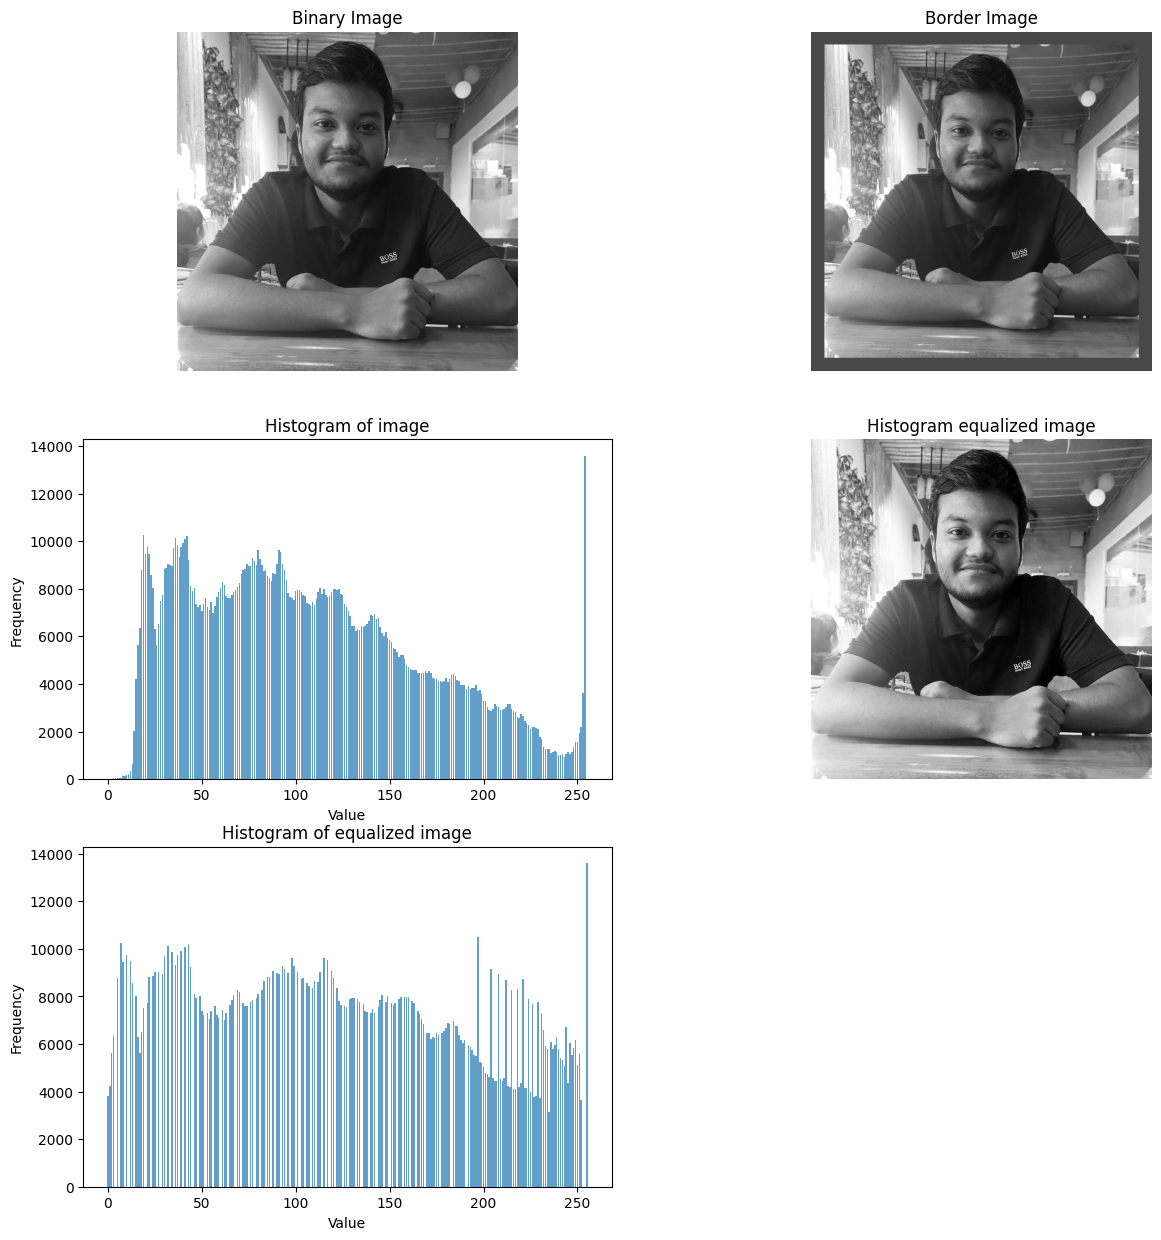

In [6]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(border_img, cmap='gray')
plt.title('Border Image')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.bar(range(256), make_histogram(image), align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of image')

plt.subplot(3, 2, 4)
plt.imshow(histogram_equalization(image), cmap='gray')
plt.axis('off')
plt.title('Histogram equalized image')

plt.subplot(3,2,5)
plt.bar(range(256), make_histogram(histogram_equalization(image)), align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of equalized image')

plt.show()